# Categorical cross entropy
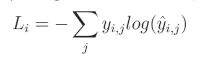

In [5]:
import numpy as np
import math

softmax_output= [0.7, 0.1, 0.2]
target_output= [1, 0, 0]

loss_manual= ((1 * math.log(0.7)) + (0 * math.log(0.1)) + (0 * math.log(0.1))) * -1
loss_numpy= (target_output[0] * math.log(softmax_output[0]) + 
             target_output[1] * math.log(softmax_output[1]) + 
             target_output[2] * math.log(softmax_output[2])) * -1

loss_manual, loss_numpy

(0.35667494393873245, 0.35667494393873245)